Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

   1. Vanilla logistic regression
   2. Ridge logistic regression
   3. Lasso logistic regression
   
In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

## Data Cleaning

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set_style('white')

In [15]:
df.head

<bound method NDFrame.head of                                                     population violent_crime  \
City                                                                           
Adams Village                                              NaN             0   
Addison Town and Village                                   NaN             3   
Akron Village                                              NaN             3   
Albany                                                     NaN           791   
Albion Village                                             NaN            23   
Alfred Village                                             NaN             5   
Allegany Village                                           NaN             3   
Amherst Town                                               NaN           107   
Amityville Village                                         NaN             9   
Amsterdam                                                  NaN            30   
Arcade Vil

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/browsingATM/Thinkful/master/Unit%203/nyc_crime.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])


In [6]:
#standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [22]:
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['violent_crime'] = pd.to_numeric(df['violent_crime'], errors='coerce')
df['murder_and_nonnegligent_manslaughter'] = pd.to_numeric(df['murder_and_nonnegligent_manslaughter'], errors='coerce')
df['rape_revised_definition1'] = pd.to_numeric(df['rape_revised_definition1'], errors='coerce')
df['rape_legacy_definition2'] = pd.to_numeric(df['rape_legacy_definition2'], errors='coerce')
df['robbery'] = pd.to_numeric(df['robbery'], errors='coerce')
df['aggravated_assault'] = pd.to_numeric(df['aggravated_assault'], errors='coerce')
df['property_crime'] = pd.to_numeric(df['property_crime'], errors='coerce')
df['burglary'] = pd.to_numeric(df['burglary'], errors='coerce')
df['larceny-theft'] = pd.to_numeric(df['larceny-theft'], errors='coerce')
df['motor_vehicle_theft'] = pd.to_numeric(df['motor_vehicle_theft'], errors='coerce')
df['arson3'] = pd.to_numeric(df['arson3'], errors='coerce')

In [25]:
df.dtypes

population                              float64
violent_crime                           float64
murder_and_nonnegligent_manslaughter    float64
rape_revised_definition1                float64
rape_legacy_definition2                 float64
robbery                                 float64
aggravated_assault                      float64
property_crime                          float64
burglary                                float64
larceny-theft                           float64
motor_vehicle_theft                     float64
arson3                                  float64
violent crime                           float64
motor_vehicletheft                      float64
dtype: object

## Features Engineering

ValueError: max must be larger than min in range parameter.

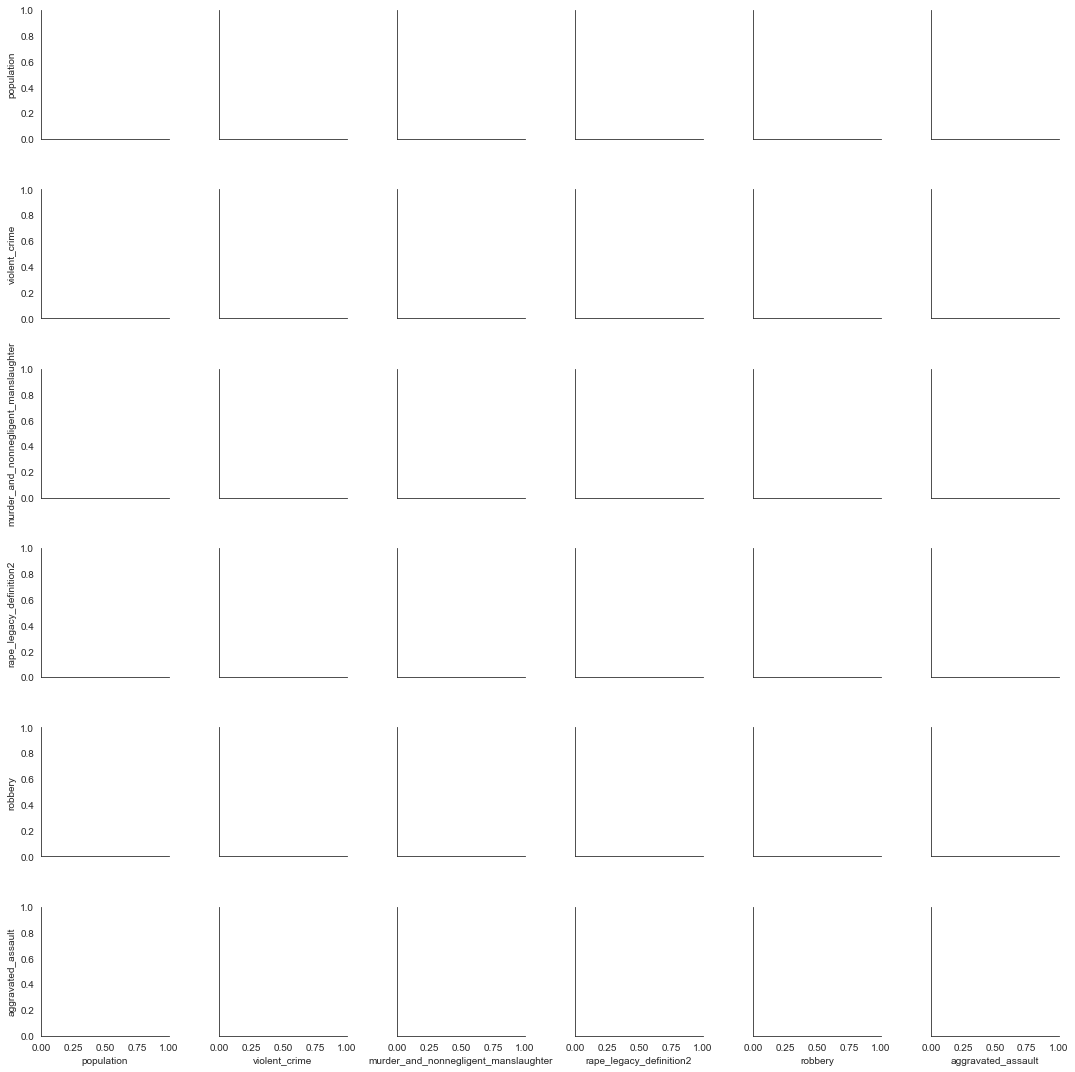

In [30]:
sns.pairplot(df, 
             vars = ['population', 'violent_crime', 'murder_and_nonnegligent_manslaughter',
                     'rape_legacy_definition2', 'robbery',
                    'aggravated_assault'])
#too big?

## Logistic Regression

In [ ]:
# use np.where to turn x > 0 into a 1 for classification

In [ ]:
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

## Ridge/L2 Regression